Andika Bintang Ramadhan

231011403171

UTS

--------------

In [66]:
import pandas as pd

In [67]:
df = pd.read_csv('data_pelanggan.csv')
df.head()

,umur,pendapatan,pembelian_tahunan,loyalitas
0,58,77,6,Tidak Loyal
1,48,52,8,Tidak Loyal
2,34,91,5,Tidak Loyal
3,27,117,4,Tidak Loyal
4,40,66,2,Tidak Loyal


In [68]:
df['loyalitas'] = df['loyalitas'].map({'Loyal': 1, 'Tidak Loyal': 0})

----------------

In [69]:
df.head()

,umur,pendapatan,pembelian_tahunan,loyalitas
0,58,77,6,0
1,48,52,8,0
2,34,91,5,0
3,27,117,4,0
4,40,66,2,0


Cek Missing Value

In [70]:
df.info()
print("\nMissing Value:\n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   umur               100 non-null    int64
 1   pendapatan         100 non-null    int64
 2   pembelian_tahunan  100 non-null    int64
 3   loyalitas          100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB

Missing Value:
 umur                 0
pendapatan           0
pembelian_tahunan    0
loyalitas            0
dtype: int64


Index(['umur', 'pendapatan', 'pembelian_tahunan', 'loyalitas'], dtype='object')

-----------

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

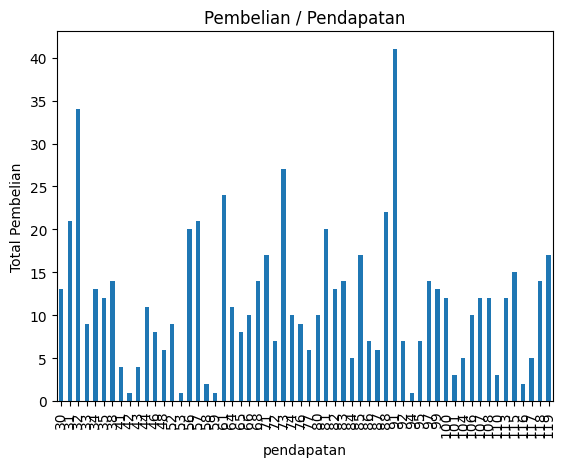

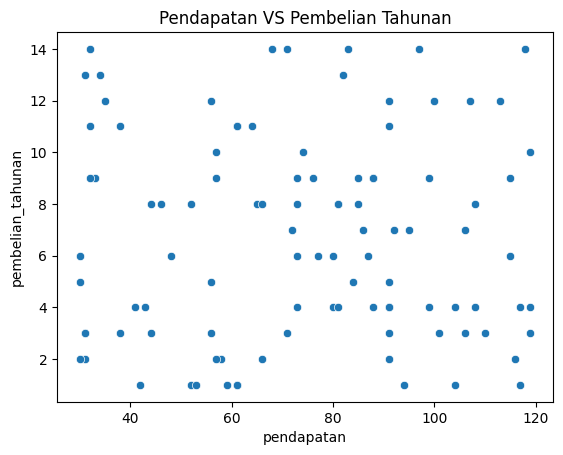

In [72]:
df.groupby('pendapatan')['pembelian_tahunan'].sum().plot(kind='bar', title = 'Pembelian / Pendapatan')
plt.ylabel('Total Pembelian')
plt.show()

sns.scatterplot(data = df, x = 'pendapatan', y = 'pembelian_tahunan')
plt.title('Pendapatan VS Pembelian Tahunan')
plt.show()

--------------------

Klasifikasi Data

Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
df['Label'] = df ['pendapatan'].apply(lambda x : 1 if x > 0 else 0)
features = df[['pembelian_tahunan', 'umur']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test, = train_test_split(features, labels, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Decision Tree")
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print(df['Label'].value_counts())

Decision Tree
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix :
 [[30]]
Label
1    100
Name: count, dtype: int64


c:\Users\BINTANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


--------------------

KNN (K - Nearest Neighbour)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
df['Label'] = df ['pembelian_tahunan'].apply(lambda x : 1 if x > 0 else 0)
features = df[['pendapatan', 'umur']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test, = train_test_split(features, labels, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Decision Tree")
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print(df['Label'].value_counts())

Decision Tree
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\BINTANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Confusion Matrix :
 [[30]]
Label
1    100
Name: count, dtype: int64


----------------

Perbandingan Kedua Metode

a. Kedua model sama sama menghasilkan akurasi 100% untuk klasifikasinya 

b. Hasil keduanya cenderung konsisten dalam mengklasifikasikan dataset dengan menghasilkan akurasi 100%

----------------

Kesimpulan


Kedua metode baik Decision Tree dan KNN (K - Nearest Neighbour) sama sama memiliki akurasi 100% dalam mengklasifikasikan dataset tersebut meskipun algoritma keduanya berbeda.